In [36]:
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras import backend as K
#K.set_image_dim_ordering('th')
from keras.utils import to_categorical
#from sklearn.cross_validation import StratifiedKFold

In [37]:
PATH = os.getcwd()
print (PATH)

C:\Users\tasni\Desktop\STUDY\GL4\SEM2\ProjectTI\Spectral_Images_Processing


In [38]:
# Load the Global values (windowSize, numPCAcomponents, testRatio) from the text file global_variables.txt
myFile = open('global_variables.txt', 'r') 
file = myFile.readlines()[:]


for line in file:

    if line[0:3] == "win":

        ds = line.find('=')
        windowSize = int(line[ds+1:-1],10)

    elif line[0:3] == "num":

        ds = line.find('=')
        numPCAcomponents = int(line[ds+2:-1],10)

    else:

        ds = line.find('=')
        testRatio = float(line[ds+1:])


In [39]:
# Global Variables
#windowSize = 5
#numPCAcomponents = 30
#testRatio = 0.25

# Load Training Dataset

In [40]:
X_train = np.load("X_trainPatches_" + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio)  + ".npy")

y_train = np.load("y_trainPatches_" + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + ".npy")

In [41]:
# Reshape into (numberofsamples, channels, height, width)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[3], X_train.shape[1], X_train.shape[2]))

In [42]:
# convert class labels to on-hot encoding
y_train = to_categorical(y_train)

In [43]:
# Define the input shape 
input_shape= X_train[0].shape
print(input_shape)

(30, 5, 5)


In [44]:
# number of filters
C1 = 3*numPCAcomponents #90

In [45]:
model = Sequential()

#Add input layer with the same shape as the training data
model.add(Input(shape = X_train[0].shape, name = "Input_Layer"))

#Add batch normalization layer to improve model stability and convergence
model.add(BatchNormalization(name = "BatchNormalization"))

#Add dense layers with 128 neurons and ReLU activation
model.add(Dense(units = 128, activation= "relu", name = "Layer1"))
model.add(Dense(units = 128, activation= "relu", name = "Layer2"))
model.add(Dense(units = 128, activation= "relu", name = "Layer3"))
model.add(Dense(units = 128, activation= "relu", name = "Layer4"))

#Add dropout layer to prevent overfitting
model.add(Dropout(rate = 0.2, name = "Dropout1",))

#Add dense layers with 64 neurons and ReLU activation
model.add(Dense(units = 64, activation= "relu", name = "Layer5"))
model.add(Dense(units = 64, activation= "relu", name = "Layer6"))
model.add(Dense(units = 64, activation= "relu", name = "Layer7"))
model.add(Dense(units = 64, activation= "relu", name = "Layer8"))

#Add another dropout layer
model.add(Dropout(rate = 0.2, name = "Dropout2"))

#Add dense layers with 32 neurons and ReLU activation
model.add(Dense(units = 32, activation= "relu", name = "Layer9"))
model.add(Dense(units = 32, activation= "relu", name = "Layer10"))
model.add(Dense(units = 32, activation= "relu", name = "Layer11"))
model.add(Dense(units = 32, activation= "relu", name = "Layer12"))

# Add global average pooling layer to remove spatial dimensions
model.add(GlobalAveragePooling2D(name="GlobalAveragePooling"))
#Add output layer with softmax activation and the same number of units as the number of classes
model.add(Dense(units = y_train.shape[1], activation= "softmax", name = "Output_Layer"))

In [46]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ BatchNormalization                   │ (None, 30, 5, 5)            │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer1 (Dense)                       │ (None, 30, 5, 128)          │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer2 (Dense)                       │ (None, 30, 5, 128)          │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer3 (Dense)                       │ (None, 30, 5, 128)          │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer4 (Dense)                       │ (None, 30, 5, 128)          │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 30, 5, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer5 (Dense)                       │ (None, 30, 5, 64)           │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer6 (Dense)                       │ (None, 30, 5, 64)           │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer7 (Dense)                       │ (None, 30, 5, 64)           │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer8 (Dense)                       │ (None, 30, 5, 64)           │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 30, 5, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer9 (Dense)                       │ (None, 30, 5, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer10 (Dense)                      │ (None, 30, 5, 32)           │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer11 (Dense)                      │ (None, 30, 5, 32)           │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer12 (Dense)                      │ (None, 30, 5, 32)           │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GlobalAveragePooling                 │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,836 (300.14 KB)

 Trainable params: 76,826 (300.10 KB)

 Non-trainable params: 10 (40.00 B)

In [47]:
sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [48]:
history= model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.0745 - loss: 2.7724
Epoch 2/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.0707 - loss: 2.7720
Epoch 3/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.0747 - loss: 2.7715
Epoch 4/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.0771 - loss: 2.7712
Epoch 5/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.0735 - loss: 2.7710
Epoch 6/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.0921 - loss: 2.7710
Epoch 7/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.0926 - loss: 2.7708
Epoch 8/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.0883 - loss: 2.7708
Epoch 9/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.0754 - loss: 2.7705
Epoch 10/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.0738 - loss: 2.7705
Epoch 11/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.0757 - loss: 2.7696
Epoch 12/50
928/928 ━━━━━━━━━━

Text(0.5, 1.0, 'Training Accuracy')

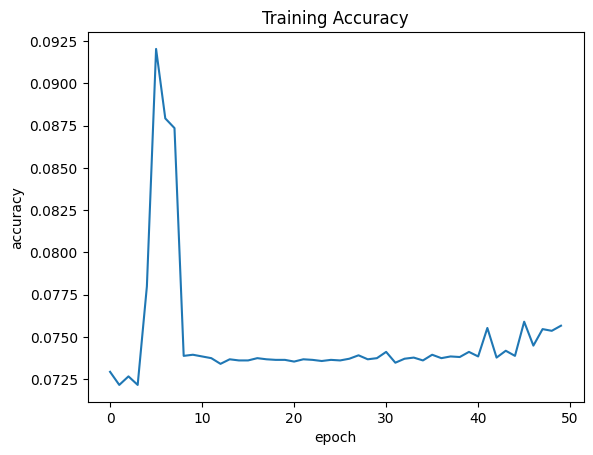

In [49]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training Accuracy")

In [50]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Print or use the metrics as needed
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)


928/928 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0720 - loss: 2.7590
Training Loss: 2.758826732635498
Training Accuracy: 0.07374094426631927


In [51]:
import h5py
from keras.models import load_model

In [52]:
model.save('my_model3' + str(windowSize) + 'PCA' + str(numPCAcomponents) + "testRatio" + str(testRatio)+'.keras')